# Import Library

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Klasifikasi Dataset Tensorflow 'malaria'

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.load("malaria", split=["train[:70%]", "train[:30%]"], batch_size=-1, as_supervised=True)

# Encoding Label Gambar

In [4]:
num_class = 10

#one hot encoding
y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test = keras.utils.to_categorical(y_test_raw, num_class)

# Preview Gambar

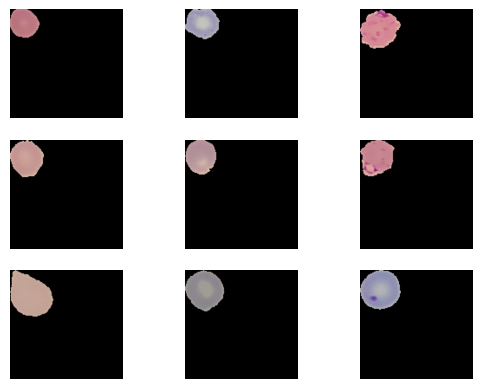

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [6]:
x_train_raw.shape

TensorShape([19291, 382, 394, 3])

In [7]:
x_test_raw.shape

TensorShape([8267, 382, 394, 3])

In [8]:
x_train = tf.image.resize(x_train_raw, (28,28))
x_test = tf.image.resize(x_test_raw, (28,28))

In [9]:
x_train = np.reshape(x_train.numpy(), (19291, 2352))
x_test = np.reshape(x_test.numpy(), (8267,2352))

In [10]:
# Normaliasai piksel pada gambar
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Membuat DNN
## terdiri dari 3 layers dan aktivasi RELU
### catatan : klasifikasi pada data hanya terdiri dari 2 klasifikasi oleh karena itu menggunakan 'sigmoid' dan jikan klasifikasi dataset lebih dari 2 maka menggunakan 'softmax'

In [11]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = 2352),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='sigmoid') # kalo klasifikationnya ada dua duagnti jadi softmax
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1204736   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,370,250
Trainable params: 1,370,250
Non-trainable params: 0
_________________________________________________________________


# Optimize Model
### catatan : jika dataset memiliki lebih dari 2 klasifikasi lossnya diganti categorical

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #klo ada lebih dari 2 klasifikasi lossnya diganti categorical

# Fitting Training Model

In [14]:
data = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
151/151 [==============================] - 9s 30ms/step - loss: 0.1521 - accuracy: 0.5418 - val_loss: 0.1346 - val_accuracy: 0.5616
Epoch 2/10
151/151 [==============================] - 3s 23ms/step - loss: 0.1323 - accuracy: 0.6029 - val_loss: 0.1270 - val_accuracy: 0.6509
Epoch 3/10
151/151 [==============================] - 3s 23ms/step - loss: 0.1283 - accuracy: 0.6339 - val_loss: 0.1231 - val_accuracy: 0.6712
Epoch 4/10
151/151 [==============================] - 4s 23ms/step - loss: 0.1256 - accuracy: 0.6534 - val_loss: 0.1202 - val_accuracy: 0.6807
Epoch 5/10
151/151 [==============================] - 4s 23ms/step - loss: 0.1241 - accuracy: 0.6633 - val_loss: 0.1194 - val_accuracy: 0.6816
Epoch 6/10
151/151 [==============================] - 4s 24ms/step - loss: 0.1220 - accuracy: 0.6732 - val_loss: 0.1182 - val_accuracy: 0.6888
Epoch 7/10
151/151 [==============================] - 3s 23ms/step - loss: 0.1204 - accuracy: 0.6784 - val_loss: 0.1181 - val_accuracy: 0.6879

# Evaluasi Model yang telah di train

In [15]:
# batch size 128
score = model.evaluate(x_test, y_test)
print("TEST LOSS          : ", score[0])
print("TEST ACCURACY      : ", score[1])
print("VALIDATION LOSS    :",data.history['val_loss'][-1])
print("VALIDATION ACCURACY:",data.history['val_accuracy'][-1])

259/259 [==============================] - 2s 6ms/step - loss: 0.1139 - accuracy: 0.7082
TEST LOSS          :  0.11390010267496109
TEST ACCURACY      :  0.7082375884056091
VALIDATION LOSS    : 0.1139000952243805
VALIDATION ACCURACY: 0.7082375884056091
